<a href="https://colab.research.google.com/github/kanmanidevakumar/-CODSOFT/blob/main/Stock_Price_Prediction_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#To install three specific libraries
#1.tensorflow-ml framework for CNN architecture(Multi layer perceptron)
#2.yfinance -to get historical data of the market
#3.scikit-learn-data preprocessing,feature selection.
!pip install tensorflow yfinance scikit-learn


In [ ]:
import yfinance as yf #to fetch historical stock data
import pandas as pd   #data manipulation and analysis(cleaning process of data)
import numpy as np    #numerical operations
from sklearn.preprocessing import MinMaxScaler  #to normalize the data
from tensorflow.keras.models import Sequential  # linear stack of layers
from tensorflow.keras.layers import Dense       #to create fully connected layers
from sklearn.metrics import mean_squared_error  # model's performance


In [ ]:
# Define the stock symbol and fetch data
stock_symbol = 'AAPL'  # Apple Inc.
data = yf.download(stock_symbol, start='2010-01-01', end='2024-08-31')

# Display the first few rows of the data
print(data.head())


[*********************100%***********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.454504  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.465664  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.362818  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.351055  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.393281  447610800


In [ ]:
# Use 'Open', 'High', 'Low', 'Volume', and 'Close' as features
features = data[['Open', 'High', 'Low', 'Volume', 'Close']]


In [ ]:
# Apply Min-Max Scaling to normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features) #scaling the features(all value are closer to one another)

# Convert the scaled data back to a DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=features.columns)


In [ ]:
# Define the size of the training set
training_size = int(len(scaled_data) * 0.8) #training size of data eg.800out of 1000
train_data = scaled_data[:training_size] #extract the data from training
test_data = scaled_data[training_size:]  #remaining 200 for testing

# Prepare training and testing datasets
X_train = train_data.drop('Close', axis=1) #define the input data used in training
y_train = train_data['Close']              #define the output data used in training
X_test = test_data.drop('Close', axis=1)   #define the input data used in testing
y_test = test_data['Close']                #define the output data used in testing


In [ ]:
model = Sequential()

# Input layer with 4 neurons (as there are 4 features: Open, High, Low, Volume)
model.add(Dense(128, input_dim=4, activation='relu')) #Adds the input layer with 128 neurons.

# Hidden layers
model.add(Dense(64, activation='relu'))  #Adds the first hidden layer with 64 neurons
model.add(Dense(32, activation='relu'))  #Adds the first hidden layer with 32 neurons

# Output layer with 1 neuron (predicting the 'Close' price)
model.add(Dense(1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#The optimizer updates the model's weights based on calculated gradients to minimize the loss function
#The loss function measures how well the model's predictions match the actual target values.
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Fit the model on the training data
#epochs-The number of times the model will go through the entire training dataset.(practices)
#batch-size:he number of samples processed before the model's weights are updated(split the data)
#Controls the verbosity of the training output.(like coach)
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0101
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7196e-05
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.4301e-06
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.8407e-06
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.9076e-06
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.0628e-06
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6301e-06
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.0245e-06
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1779e-05
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.7769e-06
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.6449e-06
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.2569e-06
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.8505e-06
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.4470e-06
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━

In [ ]:
# Predict the 'Close' prices on the test data
predictions = model.predict(X_test)

# Calculate Mean Squared Error (MSE)(model performance how the predicted value is related to actual value)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Mean Squared Error: 4.7353933644978744e-05


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Stock Price for Next Day: 226.50743624926176


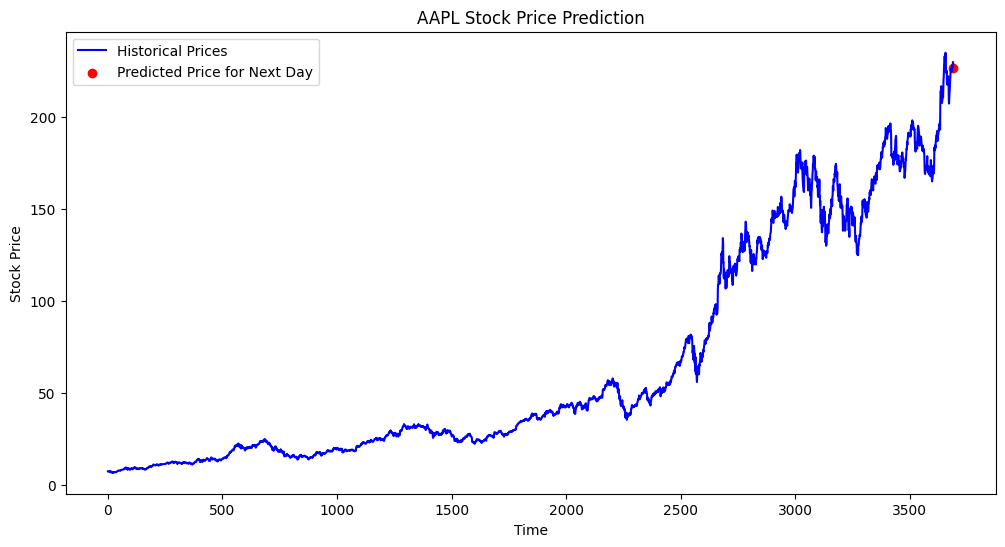

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predict the price for the next day based on the last available data point
#drop-Remove the 'Close' column to only have the feature columns
#iloc-Select the last row, which represents the most recent data point
#Convert the data to a format suitable for prediction (2D array)
last_data = scaled_data.drop('Close', axis=1).iloc[-1].values.reshape(1, -1)
next_day_prediction = model.predict(last_data)
# Converts the normalized prediction back to the original scale.
next_day_prediction = scaler.inverse_transform([[0, 0, 0, 0, next_day_prediction[0][0]]])[0][-1]
print(f'Predicted Stock Price for Next Day: {next_day_prediction}')

# Append the predicted price to the historical data
historical_prices = data['Close'].values
predicted_prices = np.append(historical_prices, next_day_prediction)

# Plot historical prices
plt.figure(figsize=(12, 6))#Creates a new figure with a specified size
plt.plot(historical_prices, label='Historical Prices', color='blue')#Plots historical prices in blue.

# Plot predicted price for the next day
plt.scatter(len(historical_prices), next_day_prediction, color='red', label='Predicted Price for Next Day')

# Adding title and labels
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

# Display the plot
plt.show()
